# Probability Mass Function

### In the previous lesson:
+ We spoke about: 
    ## Discrete vs Continuous Distributions

When dealing with **discrete** data you use a **Probability Mass Function (PMF)** (as in our dice example). When dealing with **continuous** data, you use a **Probability Density Function (PDF)** (see our weather example).

Based on the variation of their attributes, data distributions can take many shapes and forms. In the next few lessons, you'll learn how to describe data distributions. Very often, distributions are described using their statistical mean (or **expected value**) and variance of the data, but this is not always the case. You'll see more on this in the next few lessons.

# Probability Mass Function is a Discrete Distribution. Eg Rolling a dice , tossing a coin and many more

![](../../images/pmf.png)


## Other Examples of Discrete Distributions

### The Bernoulli Distribution 
+ The Bernoulli distribution represents the probability of success for a certain experiment (the outcome being "success or not", so there are two possible outcomes). A coin toss is a classic example of a Bernoulli experiment with a probability of success 0.5 or 50%, but a Bernoulli experiment can have any probability of success between 0 and 1.

### The Poisson Distribution

+ The Poisson distribution represents the probability of $n$ events in a given time period when the overall rate of occurrence is constant. A typical example is pieces of mail. If your overall mail received is constant, the number of items received on a single day (or month) follows a Poisson distribution. Other examples might include visitors to a website, or customers arriving at a store, or clients waiting to be served in a queue.

### The Uniform Distribution
+ The uniform distribution occurs when all possible outcomes are equally likely. The dice example shown before follows a uniform distribution with equal probabilities for throwing values from 1 to 6. The dice example follows a discrete uniform distribution, but continuous uniform distributions exist as well.


# Let's look at an example in python

In [13]:
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter = collections.Counter(x)
print(counter)
len(x)

Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})


13

### Convert frequency to probability - 
+ Hint: divide each frequency value by total number of values
+ Note that the PMF is normalized so the total probabilty is 1    

In [6]:
pmf = []
for key , val in counter.items():
    pmf.append(round(val/len(x), 2))
print(counter.keys(), pmf) 

dict_keys([1, 2, 3, 4, 5]) [0.31, 0.31, 0.15, 0.08, 0.15]


In [7]:
# check for the total probability
np.array(pmf).sum()

1.0

# Plotting the Probability Mass Function

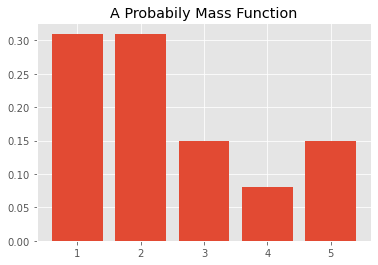

In [11]:
plt.style.use('ggplot')

plt.bar(counter.keys(), pmf);
plt.title('A Probabily Mass Function');

+ If you look carefully, there is only a difference in the y-axis: the histogram shows the frequency count of each value in a dataset, whereas the bar plot here shows probabilities. 
+ You can alter your histogram to show probabilities instead of frequency counts using the `density = True` argument. 
+ While we're at it, let's rescale our x-axis a little bit better in our histogram. You can also change the width of your vertical bars using the argument `rwidth`.

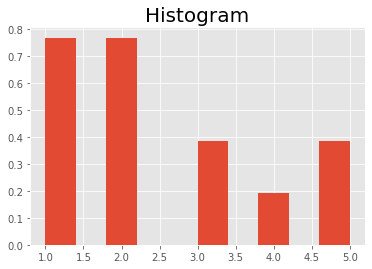

In [12]:
plt.hist(x , density=True)
plt.title('Histogram' , fontsize=20)
plt.show()

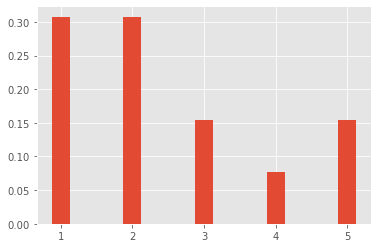

In [13]:
xtick_locations = np.arange(1.5, 7.5, 1)  # x=5, 15, 25, ...
xtick_labels = ['1', '2', '3', '4', '5']
bins = range(1, 7, 1) 
plt.xticks(xtick_locations, xtick_labels)

plt.hist(x, bins=bins,  rwidth=0.25, density=True);

# The Probability Mass Function - Exercise

The class size paradox describes apparent contradictory findings where a total allocation of resources is fixed. 
The idea behind this paradox is that there is a difference in how events are actually distributed and how events are perceived to be distributed. These types of divergence can have important consequences for data analysis. Probability mass functions (PMFs) can help resolve some of these situations, as you'll learn below.

## Objectives

You will be able to:

* Explain the class size paradox
* Create visualizations to visually compare actual and biased observations 
* Calculate the mean from PMFs to identify the expected value


## The Problem 

At a university, the expected student-to-teacher ratio is 32.5 : 1. But randomly interviewed students often feel that their average class size is bigger than 32.5. There are two main reasons for this:

1. Students typically take 4 - 5 classes at any given time, but teachers usually only teach 1 or 2 classes.
2. The number of students in a small class is small, and the number of students in a large class is large.

Due to the second fact, while randomly taking feedback from students (and sampling randomly), it is expected we will come across _more_ students from larger classes simply because there are more of them.

Let's work through a set of data to recreate and analyze this paradox. 

Suppose that a college offers 74 classes in a term. We can start with the following distribution of sizes and counts:

| Class size |  Class count |
|--------|------|
|15-19|	10|
|20-24|	10|
|25-29|	18|
|30-34|	6|
|35-39|	8|
|40-44|	10|
|45-49|	5|
|50-54|	3|
|55-59| 4|

If the campus manager were asked about the average class size, he would perform the following tasks:

## Deliverables
1. Construct a PMF from given data
2. Compute the mean using the PMF

Let's follow the management approach first and see what expected value we get from our PMF. Here is a `size_and_count` dictionary to get you started. Calculate the PMF from this data as we have done before. To make it slightly more straightforward, we have averaged the class sizes for each class, i.e. for size "15 - 19", we use the average value, 17.

In [17]:
import pandas as pd

In [37]:
size_and_count_2 = {"Class_size" : [ 17, 22, 27, 32, 37, 42, 47, 52, 57 ] ,
                 "Class_Count" :  [ 10, 10, 18, 6, 8, 10, 5, 3, 4 ]
                 }

In [30]:
columns = ["Class_size" , "Class_Count"]

In [42]:
df = pd.DataFrame(size_and_count_2)

In [43]:
df.head()

,Class_size,Class_Count
0,17,10
1,22,10
2,27,18
3,32,6
4,37,8


In [ ]:
# Let's look at the raw format and solve some questions

In [2]:
size_and_count = { 17: 10, 22: 10, 27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4 }

In [3]:
# find the total number of classes
sum_class = sum(size_and_count.values())
sum_class

74

In [46]:
# Or simply
df.Class_Count.sum()

74

In [11]:
# divide each class by the total number of classes
pmf = [round(value / sum_class , 3) for value in size_and_count.values()]

sizes = list(size_and_count.keys())
print("The sizes are: ",sizes, "\nThe Probability mass function is :" ,pmf)

The sizes are:  [17, 22, 27, 32, 37, 42, 47, 52, 57] 
The Probability mass function is : [0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054]


+ Following the approach seen at the beginning of the lesson, calculate the PMF by normalizing each size. 
+ As an additional check, these probability values must sum to 1. Let's check for that:

In [14]:
np.array(pmf).sum()

1.0

## Calculate the Mean or Expected Value $E(X)$

We can now calculate the mean or **Expected Value** for this distribution.

>The mean $\mu$ or expected value **E(X)** of a random variable $X$ is the sum of the possible values for $X$ weighted by their respective probabilities.

$$ E(X) = \mu = \sum_i p(x_i)x_i$$

In simple terms, you have to multiply each element in the sizes list by their probability of occurrence then sum the resulting values. We can do this in one line of code using NumPy broadcasting.

In [15]:
# Calculate the expected value (mu) using formula above
mu = np.multiply(sizes, pmf).sum()
mu

32.49

# Visualizations

+ Remember, we expected the average class size to be 32.5. Indeed, the calculation above confirms this. We can plot a PMF function based on our findings for visualization. 

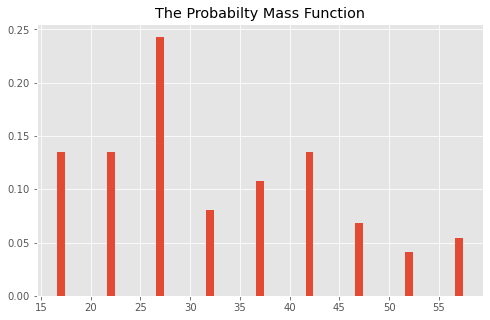

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(size_and_count.keys(), pmf);
plt.title ('The Probabilty Mass Function');
plt.show()

## Random Student Survey

Next, we conduct a survey on a random group of students about their class sizes and then compute the mean. Paradoxically, we observed that the average class is bigger than 32.5. How did this happen? Let's see this in action below:

First, let's compute a distribution as a likely observation **by students**, where the probability associated with each class size is "biased" by the **number of students** in the class. If this sounds confusing, think of it this way: instead of calculating a PMF using the counts of class sizes, calculate it using the counts of students.

Perform the following tasks to introduce this bias. 

* For each class size $x$, multiply the class probability by $x$, the number of students who observe that particular class size
* Get the sum of biased class sizes

The result is a new PMF that represents the biased distribution.

In [17]:
biased = np.multiply(sizes, pmf)

biased_sum = biased.sum()

biased, biased_sum

(array([2.295, 2.97 , 6.561, 2.592, 3.996, 5.67 , 3.196, 2.132, 3.078]), 32.49)

##### You can now normalize the new biased list with the sum of its values, just like you did before. 
- Normalize the biased list and calculate the new PMF

In [19]:
pmf2 = []
for x in biased:
    pmf2.append(round(x/biased_sum, 3))

sizes, pmf2    

([17, 22, 27, 32, 37, 42, 47, 52, 57],
 [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

In [20]:
mu_biased = np.multiply(sizes, pmf2).sum()
mu_biased

36.577

+ You can see that probability values in this PMF are different than our original pmf. Just like before, you can calculate the expected value $\mu$.  

## Here comes the paradox 

Here we see it, the average or expected value of biased results comes out much higher than the actual values. In some situations, a paradox like this can be mind-boggling. As an extra measure, you can inspect both PMFs side by side visually to see the differences. 

* Plot a figure with two axes
* Show pmf and pmf2 side by side

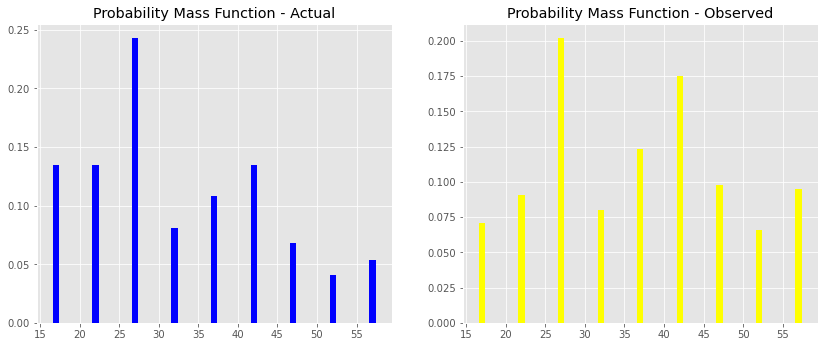

In [28]:
# Plot pmfs side by side
new_figure = plt.figure(figsize=(14,5.5))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(size_and_count.keys(), pmf, color="blue");
ax2.bar(size_and_count.keys(), pmf2, color="yellow");

ax.set_title ("Probability Mass Function - Actual");
ax2.set_title ("Probability Mass Function - Observed");

plt.show()

# Plot pmfs overlapping


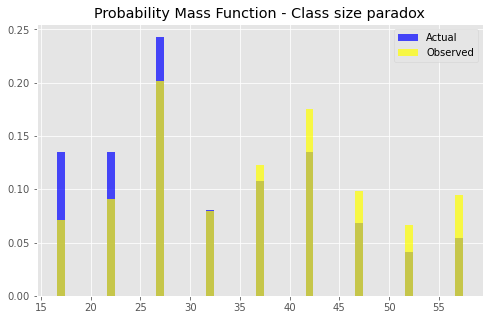

In [30]:
plt.figure(figsize=(8,5))
plt.bar(size_and_count.keys(), pmf,color="blue" ,label= 'Actual', alpha = 0.7 );
plt.bar(size_and_count.keys(), pmf2, color= "yellow", alpha = 0.7, label= 'Observed');
plt.title ("Probability Mass Function - Class size paradox");
plt.legend()
plt.show()

+ Your results tell you that in the biased distribution there are fewer small classes and more large classes. 

The mean of the biased distribution is 36.577, which is quite a bit higher than the actual mean (~32.5).

For an even more direct comparison, plot these PMFs on top of each other and change the parameter `alpha` so you can see both distributions well.

Here is the key: for smaller class sizes, the probability of coming across a students is lower than the actual probability. For larger classes, the probability of coming across a student is much higher than actual probability. This explains why the paradox takes place!

## Summary 
In this lesson, we looked at a common paradox called the "class size paradox", which deals with differences in observation by different people based on their circumstances. 

Note that this phenomenon is not just limited to class sizes. It applies to many scenarios where people are grouped together. This paradox can become really complicated due to the large number of individuals involved and the resulting variations in the probabilities of their observations which arise due to their settings. 